<a href="https://colab.research.google.com/github/rdviii/quantum-teaching/blob/main/2D-wave-interference-intensity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Plotting Intensity of Interference Pattern in 2-D Waves

Keio SFC Quantum Information Processing, Fall 2020
Based on a notebook by takanori, adapted by rdv

In [ ]:
from PIL import Image
import math
import numpy as np

\begin{eqnarray}
  \sin(2\pi t)+\sin(2\pi(t+x))
  &=& 2\sin\left(\frac{2\pi(2t+x)}{2}\right)\cos\frac{2\pi x}{2} \\
  &=& 2\sin(2\pi t+\pi x)\cos(\pi x)
\end{eqnarray}

\begin{eqnarray}
  \int_{0}^{1}\left|\sin(2\pi t)+\sin(2\pi(t+x))\right|^2dt
  &=& \int_{0}^{1}4\sin^2(2\pi t+\pi x)\cos^2(\pi x)dt \\
  &=& 4\cos^2(\pi x)\int_{0}^{1}\sin^2(2\pi t+\pi x)dt \\
  &=& 4\cos^2(\pi x)\int_{0}^{1}\sin^2(2\pi t)dt \\
  &=& 4\cos^2(\pi x)\times0.5 \\
  &=& 2\cos^2(\pi x)
\end{eqnarray}

In [ ]:
x1 = 10
# 波１のX座標(Yは常に0)(cm)
x2 = -10
# 波2のX座標(Yは常に0)(cm)
l = 0.5
# 波１，波２の波長(cm)

def F(arrX, arrY):
    r1 = np.sqrt((arrX - x1)**2 + arrY**2)
    r2 = np.sqrt((arrX - x2)**2 + arrY**2)
    x = ((r1 - r2) % l) / l
    return np.cos(math.pi*x) ** 2

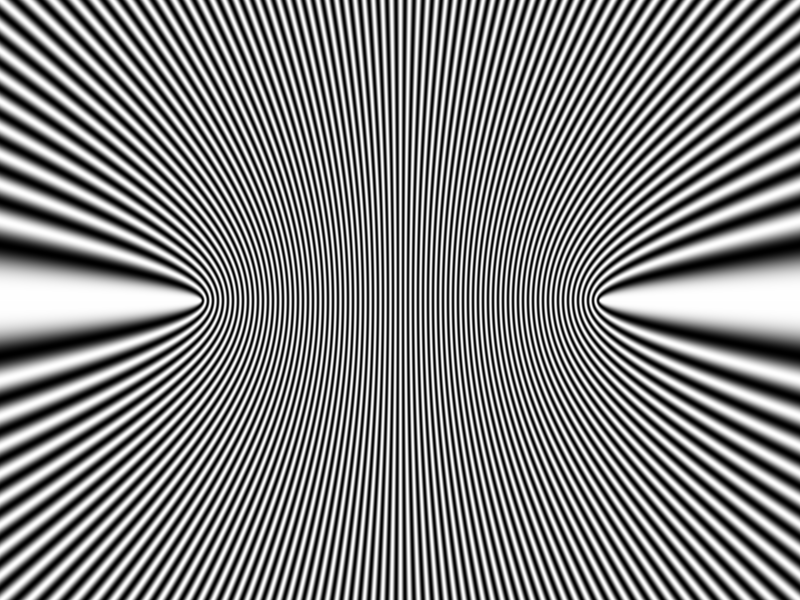

In [ ]:
height = 600
width = 800
scale = 20
x = np.arange(-width/scale/2, width/scale/2, 1/scale)
y = np.arange(-height/scale/2, height/scale/2, 1/scale)
arrX, arrY = np.meshgrid(x, y)
h = F(arrX, arrY)
Image.fromarray((h * 255).astype(np.uint8))

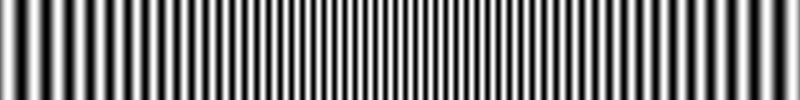

In [ ]:
height = 400
width = 800
scale = 2
x = np.arange(-width/2/scale, width/2/scale, 1/scale)
y = np.arange(-height/scale,10, 1/scale)
arrX, arrY = np.meshgrid(x, y)
h = F(arrX, arrY)
arr = h * 255
# arr = np.concatenate([
#     np.tile(arr[0], 100).reshape(100, width),
#     np.full(2 * width, 255).reshape(2, width),
#     arr
# ]).astype(np.uint8)

arr = np.tile(arr[0], 100).reshape(100, width).astype(np.uint8)
Image.fromarray(arr)

In [ ]:
arr

array([[107, 135, 163, ..., 189, 163, 135],
       [107, 135, 163, ..., 189, 163, 135],
       [107, 135, 163, ..., 189, 163, 135],
       ...,
       [107, 135, 163, ..., 189, 163, 135],
       [107, 135, 163, ..., 189, 163, 135],
       [107, 135, 163, ..., 189, 163, 135]], dtype=uint8)